<a href="https://colab.research.google.com/github/Rammm07/mini-project/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages if not already installed
!pip install scikit-learn xgboost pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV file
df = pd.read_csv('Churn_Modelling.csv')
df

Saving Churn_Modelling.csv to Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Drop columns that are identifiers and not relevant for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode 'Gender' column to numerical values
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Convert 'Geography' column using one-hot encoding, dropping first to avoid dummy variable trap
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Scale features to normalize numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##week2

initial inspection

In [5]:
print(df.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB
None


In [7]:
print(df.describe())

        CreditScore        Gender           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800      0.545700     38.921800      5.012800   76485.889288   
std       96.653299      0.497932     10.487806      2.892174   62397.405202   
min      350.000000      0.000000     18.000000      0.000000       0.000000   
25%      584.000000      0.000000     32.000000      3.000000       0.000000   
50%      652.000000      1.000000     37.000000      5.000000   97198.540000   
75%      718.000000      1.000000     44.000000      7.000000  127644.240000   
max      850.000000      1.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   

In [8]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64


data cleaning

In [12]:
# Encode 'Gender' from string to numeric
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB
None


unvariate analysis

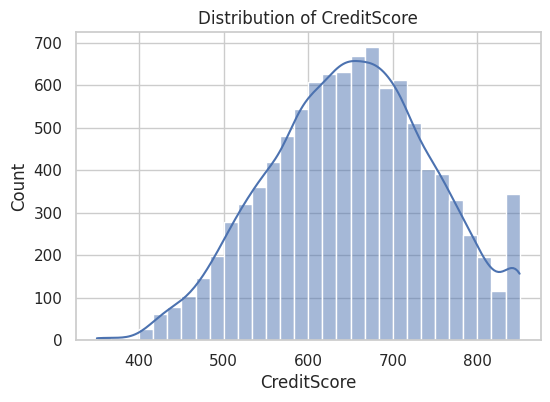

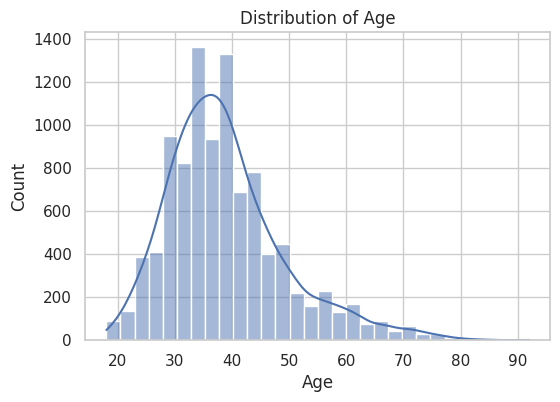

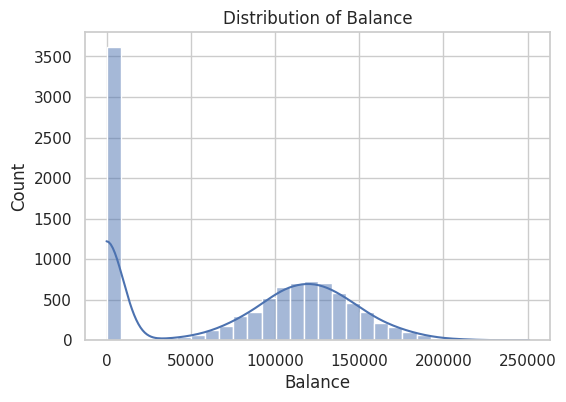

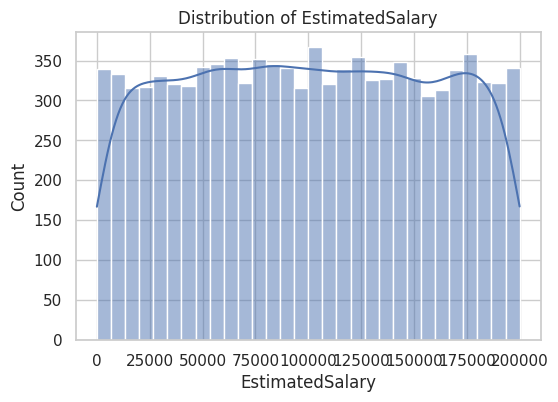

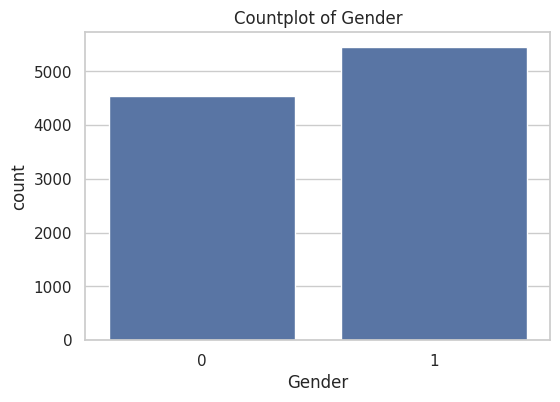

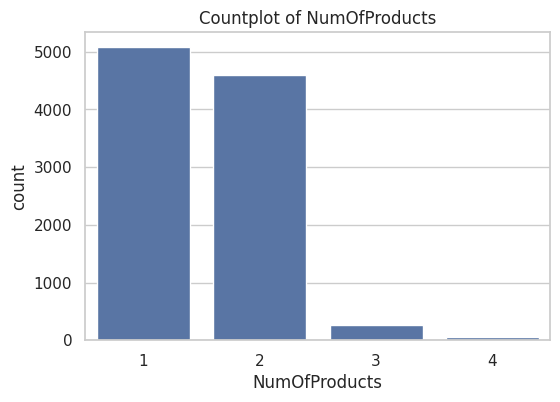

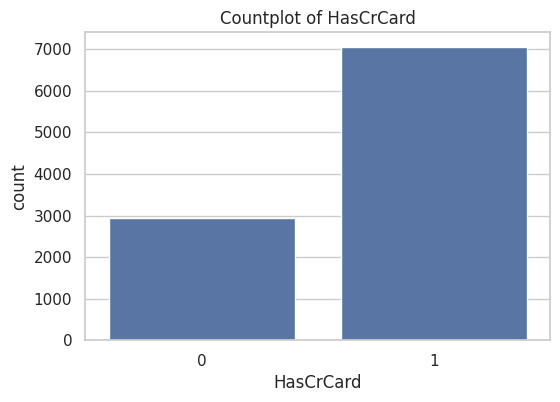

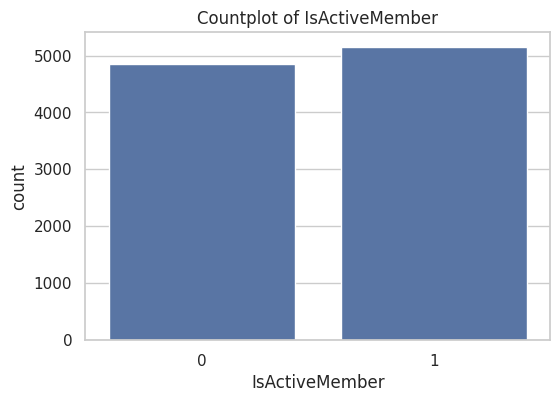

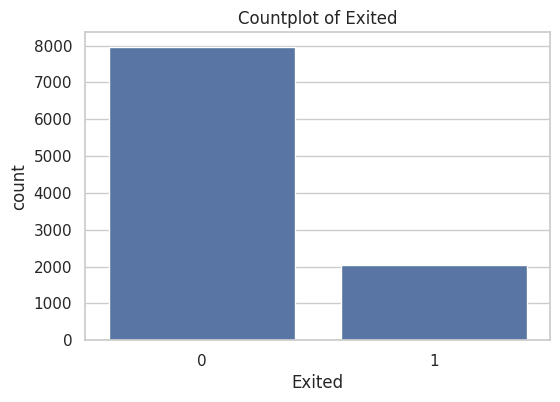

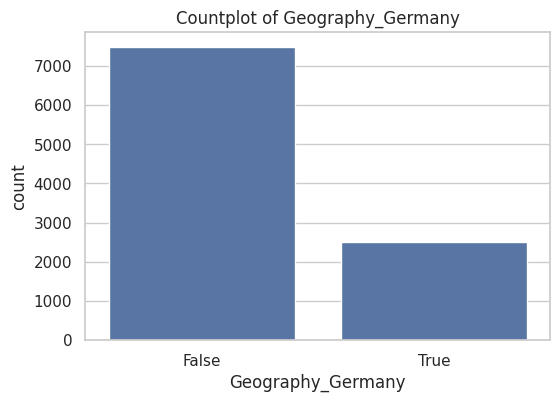

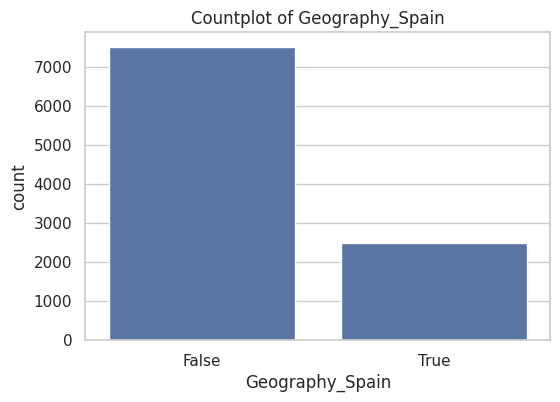

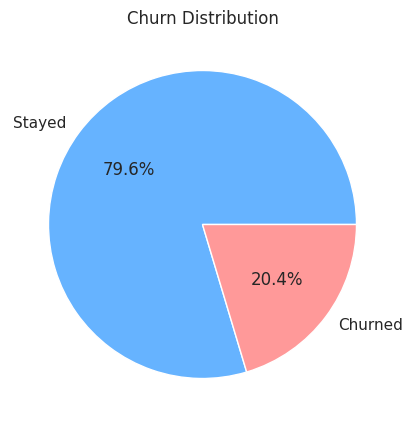

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Histogram for numerical features
for col in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plot for categorical variables
categorical_cols = ['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited',
                    'Geography_Germany', 'Geography_Spain']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

# Optional: Pie chart for churn distribution
plt.figure(figsize=(5,5))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Stayed', 'Churned'], colors=['#66b3ff','#ff9999'])
plt.title("Churn Distribution")
plt.ylabel('')
plt.show()

##week3

bivaraite analysis

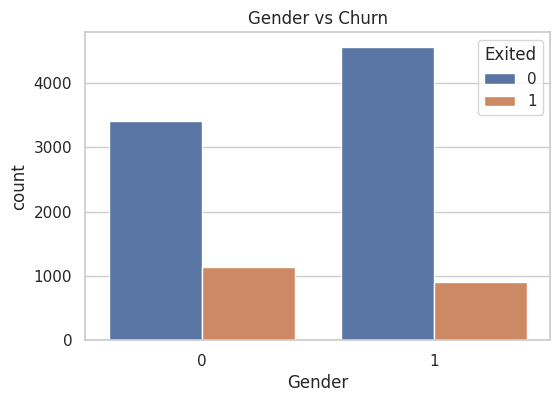

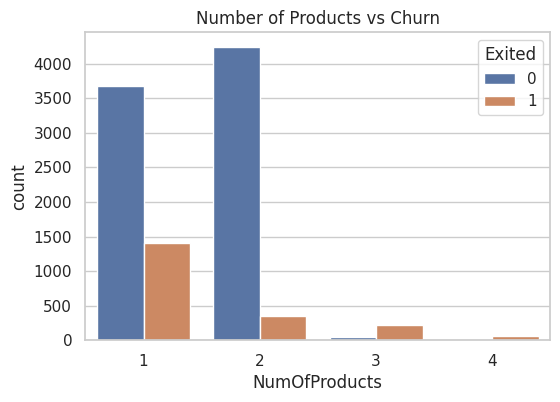

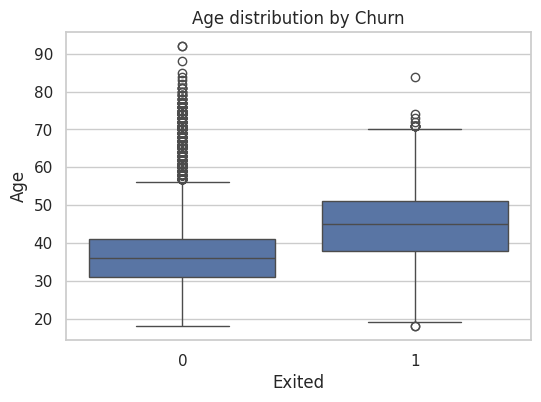

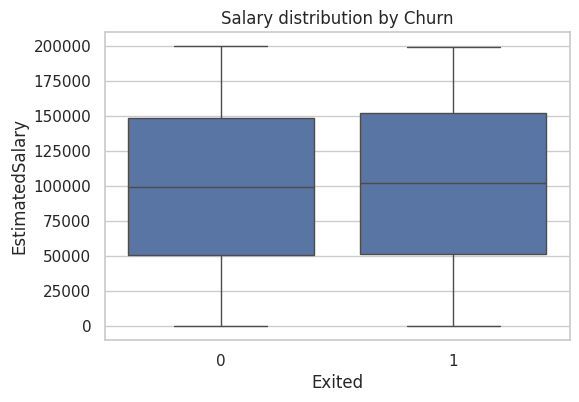

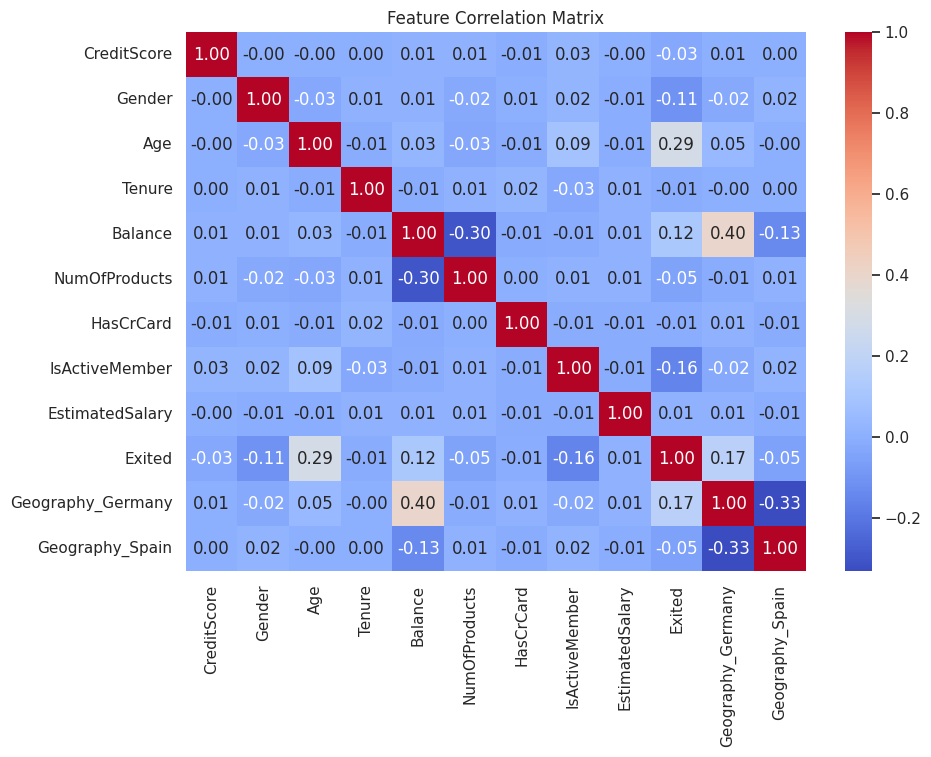

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorical Feature vs Target
# Example: Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Gender vs Churn")
plt.show()

# Example: Number of Products vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Number of Products vs Churn")
plt.show()

# 2. Numerical Feature vs Target
# Example: Age by Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age distribution by Churn")
plt.show()

# Example: Estimated Salary by Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)
plt.title("Salary distribution by Churn")
plt.show()

# 3. Correlation Matrix (to spot inter-feature relationships)
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

feature engineering

In [17]:
# 1. Create 'IsSeniorCitizen'
df['IsSeniorCitizen'] = (df['Age'] >= 60).astype(int)

# 2. Create 'BalanceSalaryRatio'
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # Add 1 to avoid division by zero

# 3. Interaction Feature: Age x Tenure
df['AgeTenureProduct'] = df['Age'] * df['Tenure']

# 4. Binning Continuous Features (e.g., Age bands)
df['Age_band'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])

# 5. Encode Age_band as dummy variable
df = pd.get_dummies(df, columns=['Age_band'], drop_first=True)

print(df.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  IsSeniorCitizen  BalanceSalaryRatio  AgeTenureProduct  \
0            False                0            0.000000                84  

data preprocessing

In [19]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
#seperate features and target

In [20]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
#Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)